# **SALES PREDICTION USING PYTHON**

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [4]:
df5 = pd.read_csv('/content/Advertising.csv')

In [5]:
df5.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
print("rows = ",df5.shape[0])
print("columns = ",df5.shape[1])

rows =  200
columns =  5


In [ ]:
df5.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df5.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df5.size

1000

In [ ]:
df5.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
df5.duplicated().sum()

0

In [ ]:
df5[:2]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [ ]:
df5[:3]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


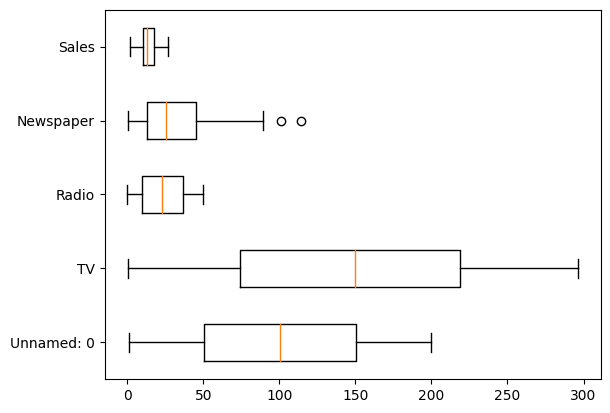

In [ ]:
plot.boxplot(df5,vert=False,data = df5,labels=df5.columns)
plot.show()

In [ ]:
df5[:5]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


'Kumar'

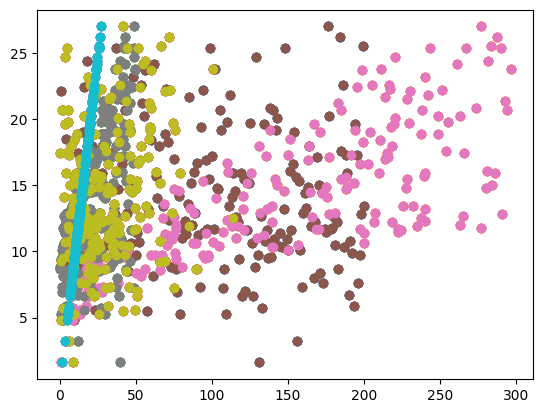

In [ ]:
def gpk():
    Preetam = df5.columns
    for x in range(len(Preetam)-1):
        for y in Preetam:
            Kumar = plot.scatter(y,'Sales',data=df5)
    return 'Kumar'
gpk()

<ipython-input-21-a4ed50e2c1a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df5['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

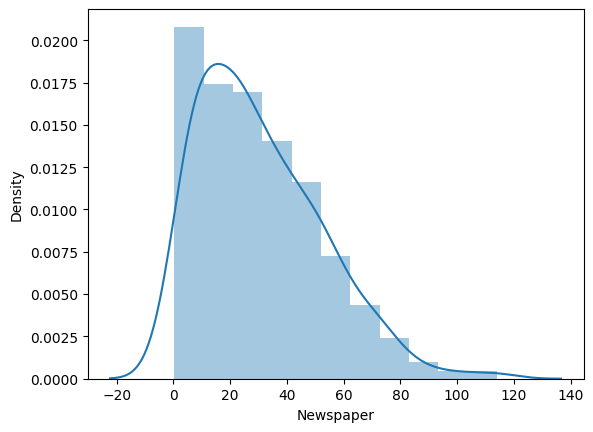

In [ ]:
sbn.distplot(df5['Newspaper'])

<ipython-input-22-de7946cc2ae5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df5['Radio'])


<Axes: xlabel='Radio', ylabel='Density'>

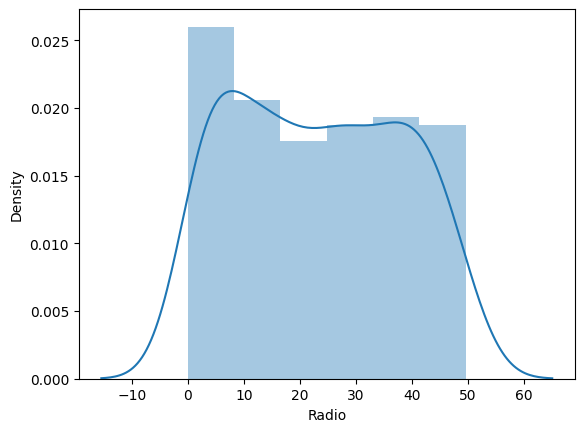

In [ ]:
sbn.distplot(df5['Radio'])

In [6]:
df5.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [7]:
a=df5.iloc[:,:-1]
a

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
b = df5.iloc[:,-1:]

In [9]:
from sklearn.model_selection import train_test_split
atrain,atest,btrain,btest  = train_test_split(a,b,test_size=0.3,random_state=43)

In [10]:
atrain,btrain

(        TV  Radio  Newspaper
 71   109.8   14.3       31.7
 90   134.3    4.9        9.3
 100  222.4    4.3       49.8
 44    25.1   25.7       43.3
 94   107.4   14.0       10.9
 ..     ...    ...        ...
 58   210.8   49.6       37.7
 21   237.4    5.1       23.5
 49    66.9   11.7       36.8
 64   131.1   42.8       28.9
 68   237.4   27.5       11.0
 
 [140 rows x 3 columns],
      Sales
 71    12.4
 90    11.2
 100   11.7
 44     8.5
 94    11.5
 ..     ...
 58    23.8
 21    12.5
 49     9.7
 64    18.0
 68    18.9
 
 [140 rows x 1 columns])

In [11]:
atest,btest

(        TV  Radio  Newspaper
 56     7.3   28.1       41.4
 37    74.7   49.4       45.7
 67   139.3   14.5       10.2
 79   116.0    7.7       23.1
 80    76.4   26.7       22.3
 188  286.0   13.9        3.7
 183  287.6   43.0       71.8
 10    66.1    5.8       24.2
 128  220.3   49.0        3.2
 62   239.3   15.5       27.3
 65    69.0    9.3        0.9
 17   281.4   39.6       55.8
 133  219.8   33.5       45.1
 195   38.2    3.7       13.8
 146  240.1    7.3        8.7
 38    43.1   26.7       35.1
 173  168.4    7.1       12.8
 149   44.7   25.8       20.6
 93   250.9   36.5       72.3
 29    70.6   16.0       40.8
 0    230.1   37.8       69.2
 2     17.2   45.9       69.3
 122  224.0    2.4       15.6
 180  156.6    2.6        8.3
 95   163.3   31.6       52.9
 121   18.8   21.7       50.4
 185  205.0   45.1       19.6
 39   228.0   37.7       32.0
 66    31.5   24.6        2.2
 19   147.3   23.9       19.1
 11   214.7   24.0        4.0
 45   175.1   22.5       31.5
 41   177.

# Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression()

In [15]:
model.fit(atrain,btrain)

LinearRegression()

In [16]:
bpred=model.predict(atest)
bpred

array([[ 8.41710143],
       [15.36146115],
       [12.08619274],
       [ 9.75953058],
       [11.37799221],
       [18.73526253],
       [23.94158412],
       [ 7.11931733],
       [22.06606191],
       [16.83172907],
       [ 7.93115903],
       [23.07243791],
       [19.15729792],
       [ 5.47677475],
       [15.42102256],
       [ 9.82205717],
       [12.08023645],
       [ 9.76094922],
       [21.07717663],
       [ 9.13945016],
       [20.36205828],
       [12.03862691],
       [13.78082146],
       [10.73225482],
       [16.20061541],
       [ 7.77042699],
       [20.6251206 ],
       [20.31966315],
       [ 8.97266008],
       [14.13746173],
       [17.28381353],
       [15.13827164],
       [17.18376843],
       [19.03374633],
       [17.13952183],
       [12.14670527],
       [12.7815946 ],
       [ 6.08135492],
       [10.06634988],
       [13.48921606],
       [12.01549843],
       [ 9.70107337],
       [ 5.35398678],
       [10.14966171],
       [14.224196  ],
       [14

In [17]:
model.score(atrain,btrain)*100

88.44142326775768

In [18]:
model.score(atest,btest)*100

92.20854203535252

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [21]:
mean_squared_error(btest,bpred)

2.2412862530933473

In [22]:
mean_absolute_error(btest,bpred)

1.2212299380899396

In [23]:
r2_score(btest,bpred)*100

92.20854203535252

In [24]:
guntuku = np.sqrt(mean_squared_error(btest,bpred))
guntuku

1.4970926000396059

In [25]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [26]:
ram = KFold(n_splits=5,shuffle=True, random_state=0)
ram

KFold(n_splits=5, random_state=0, shuffle=True)

In [27]:
scores=cross_val_score(model,a,b,cv=ram,n_jobs=-1)
final_score=np.mean(scores)
final_score

0.8910650514774895

Data Visualization

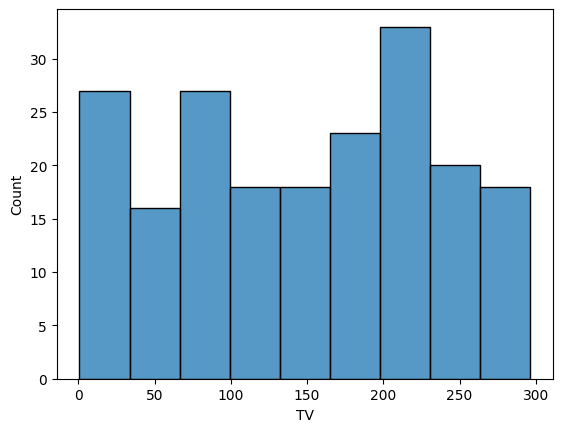

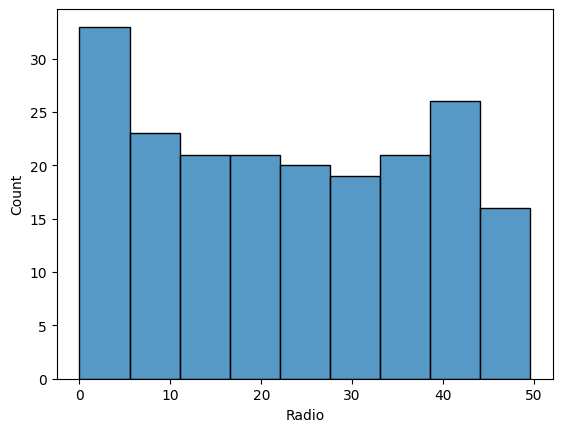

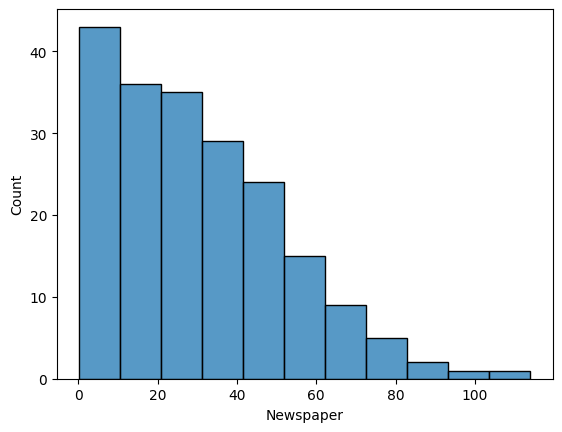

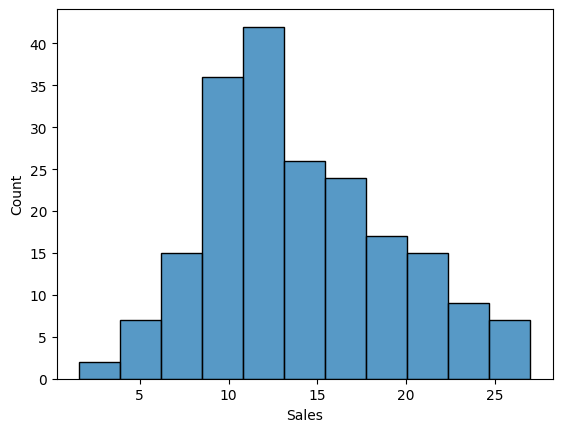

In [35]:

for i in df5.columns:
    if df5[i].dtype !="object":
        sbn.histplot(x=df5[i])
        plot.show();

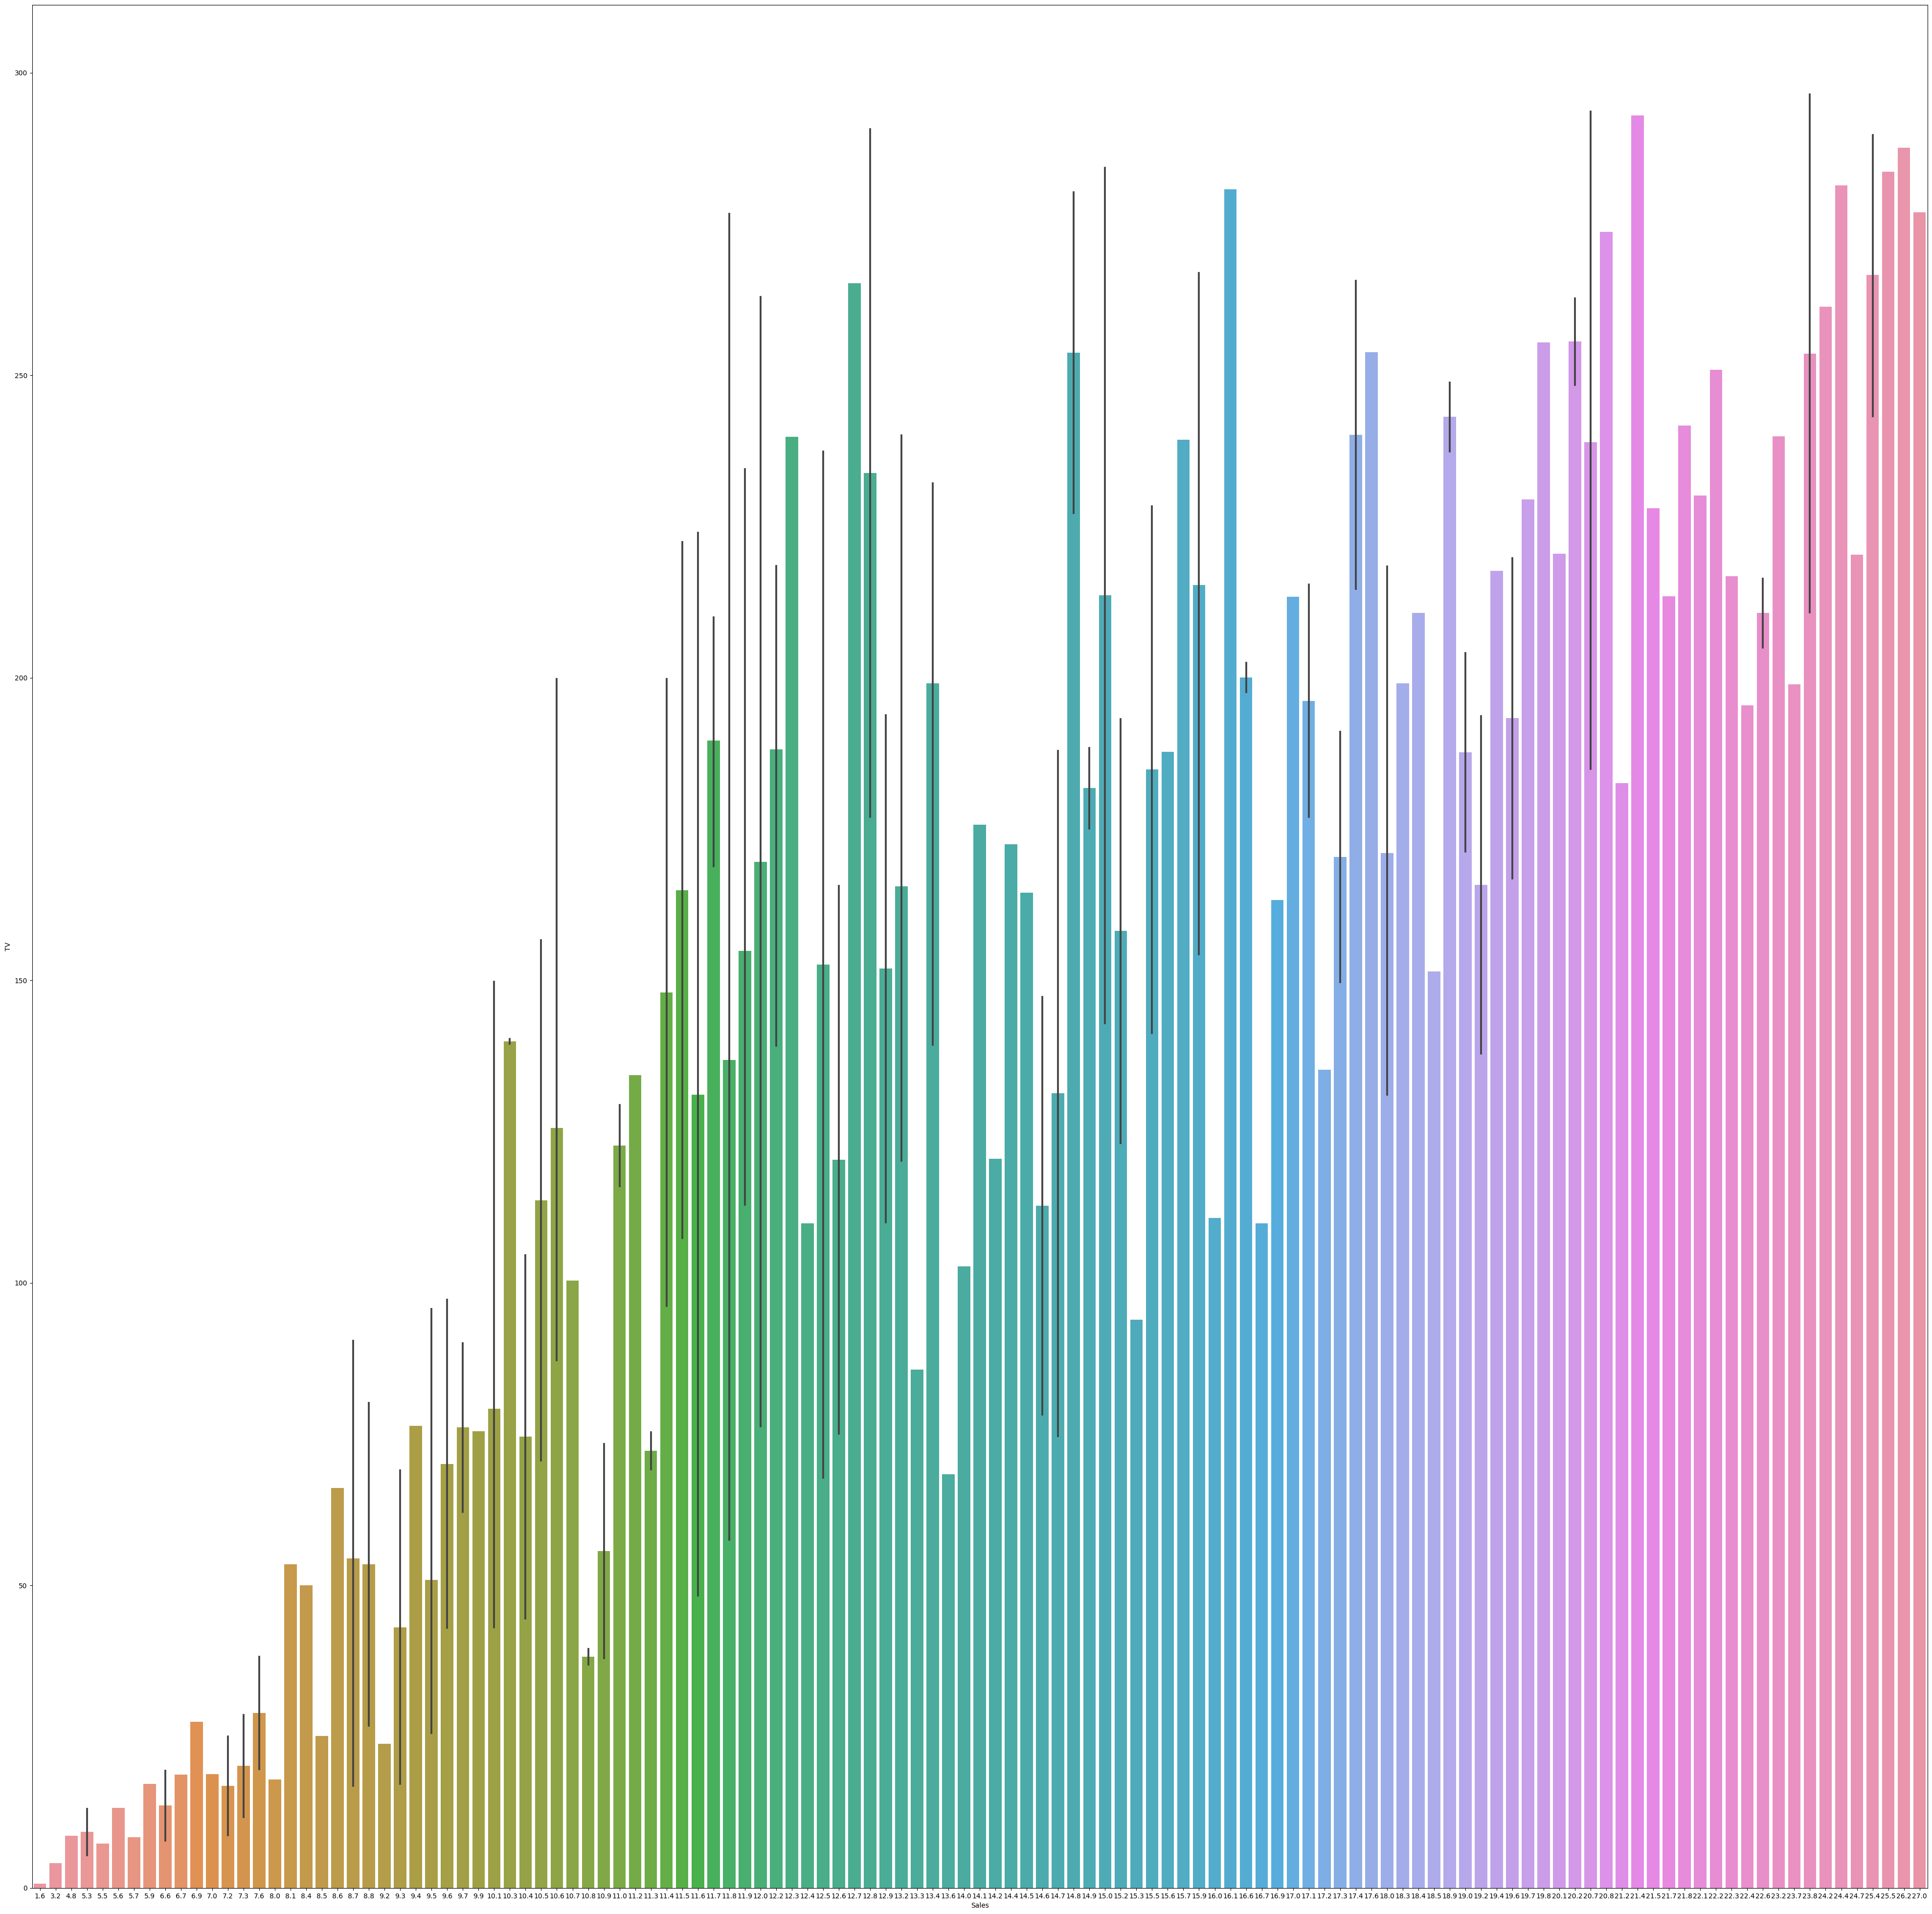

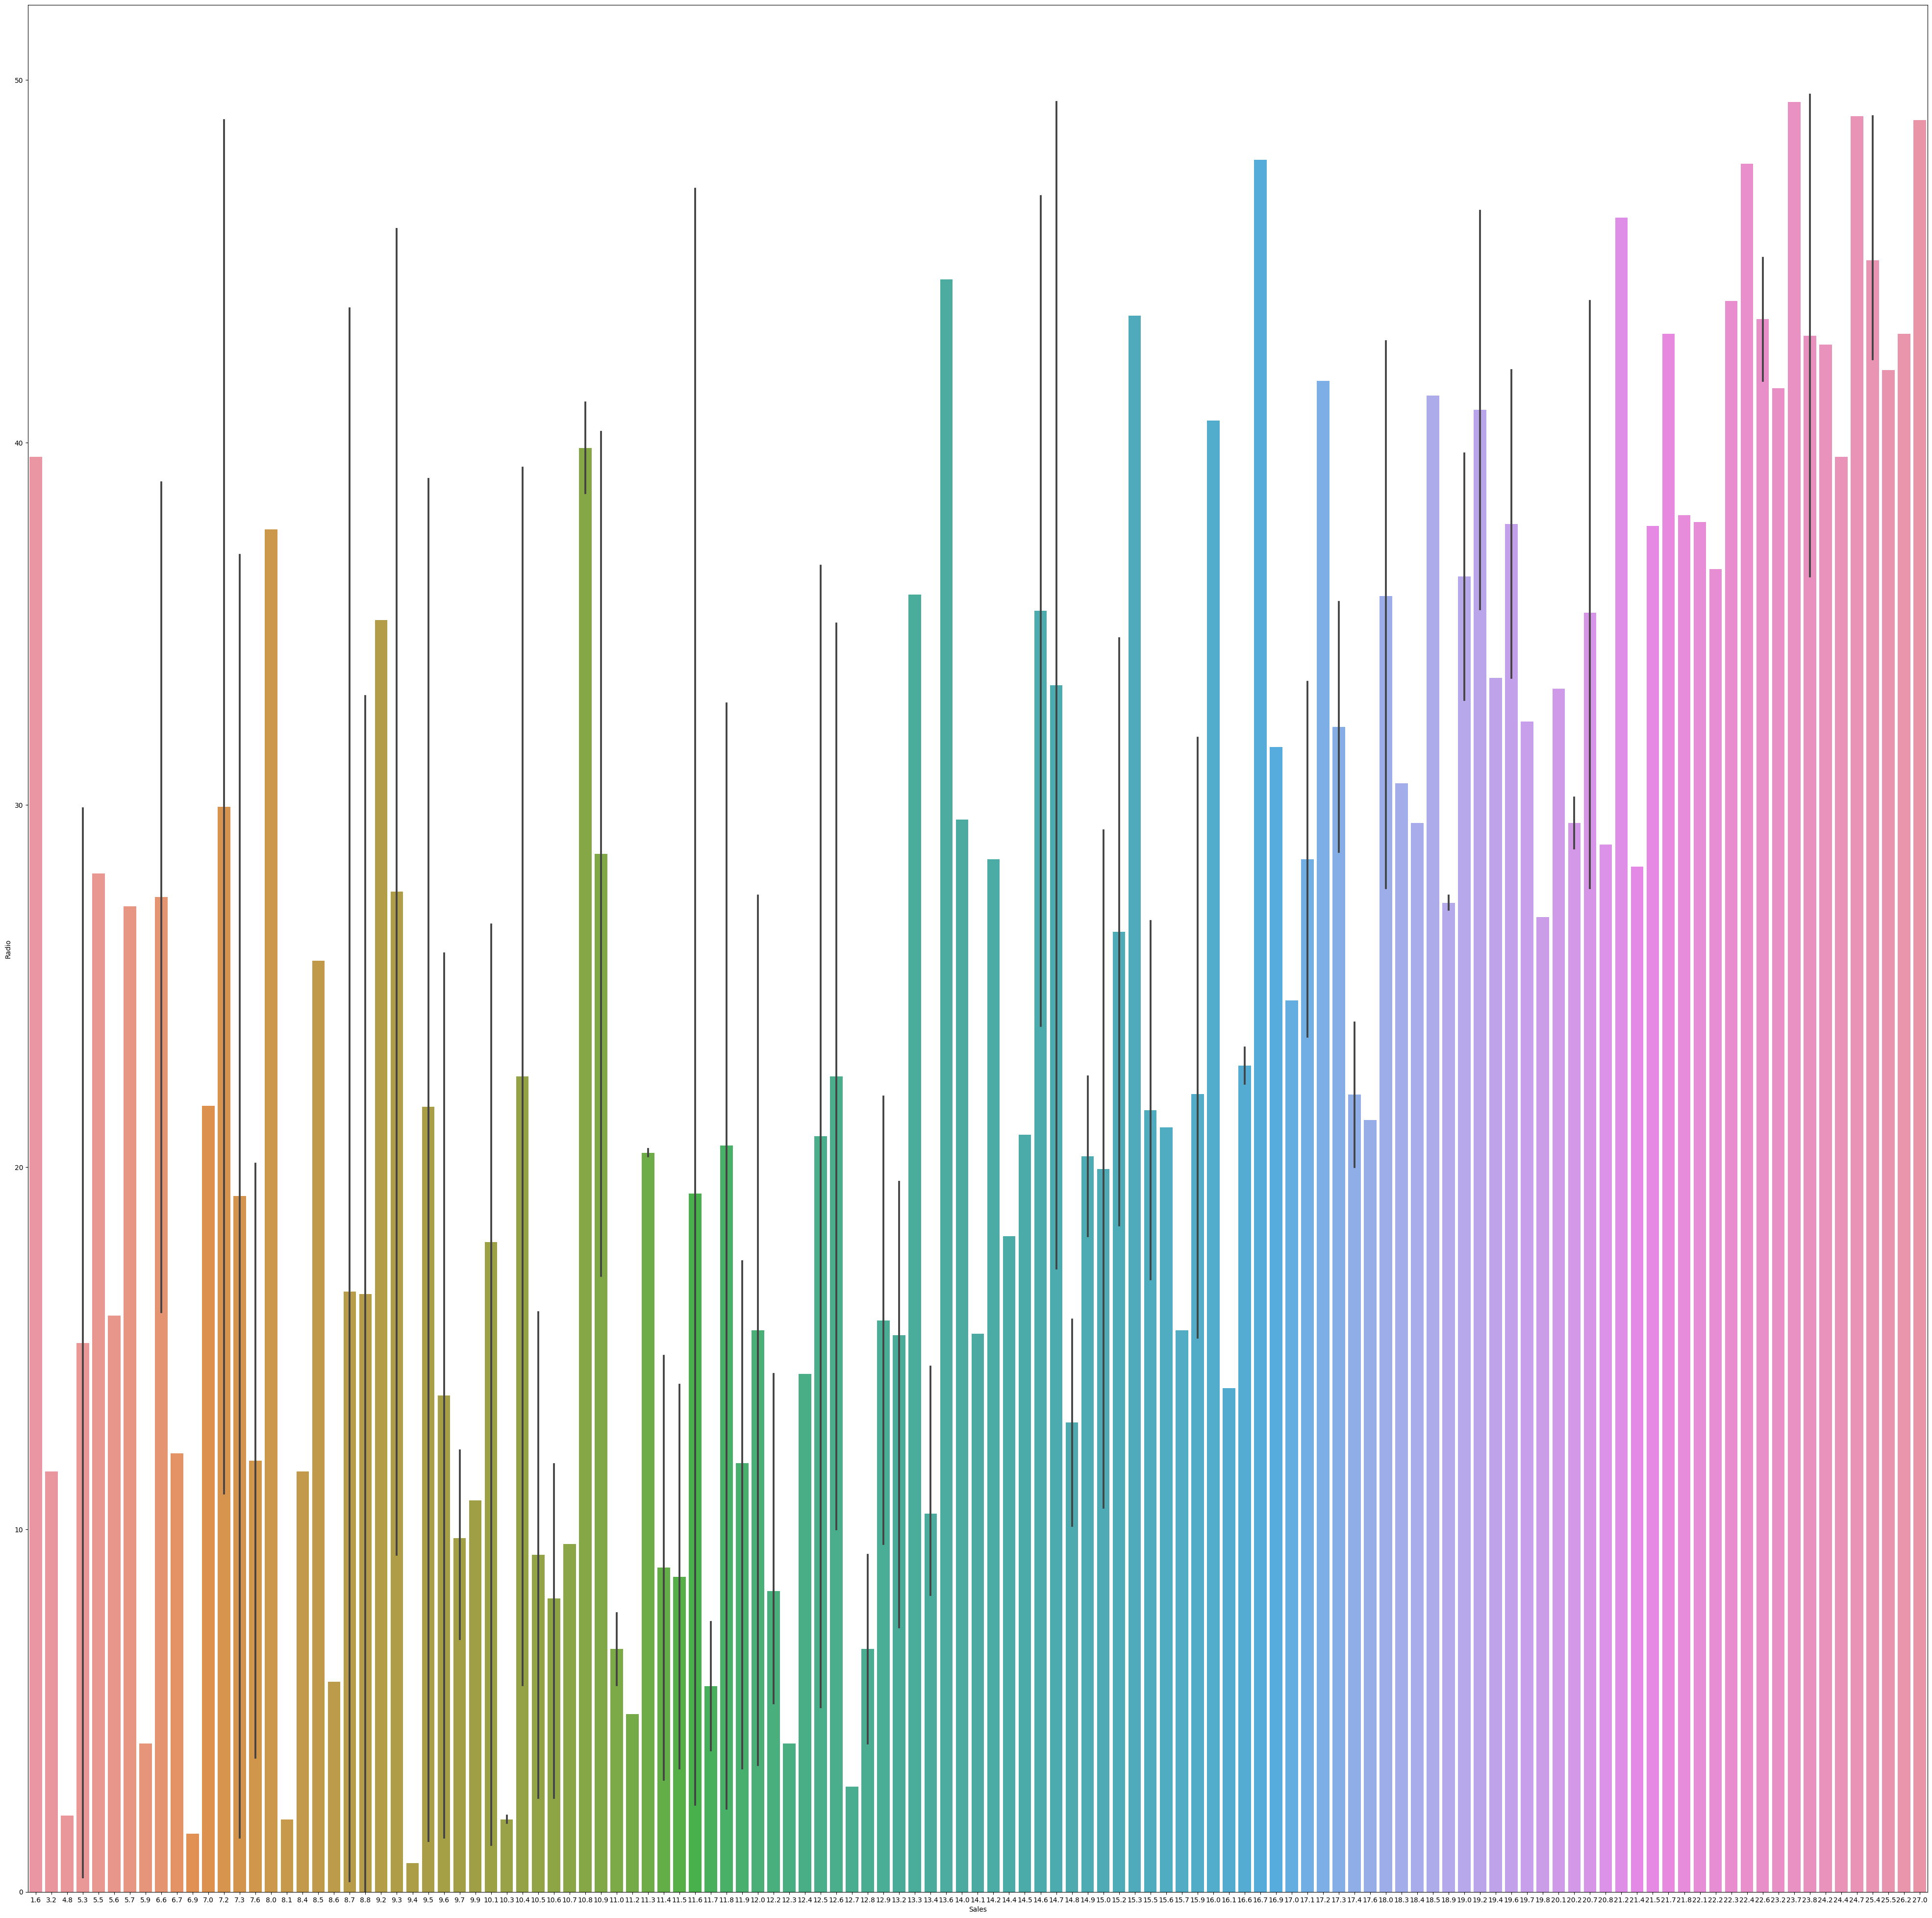

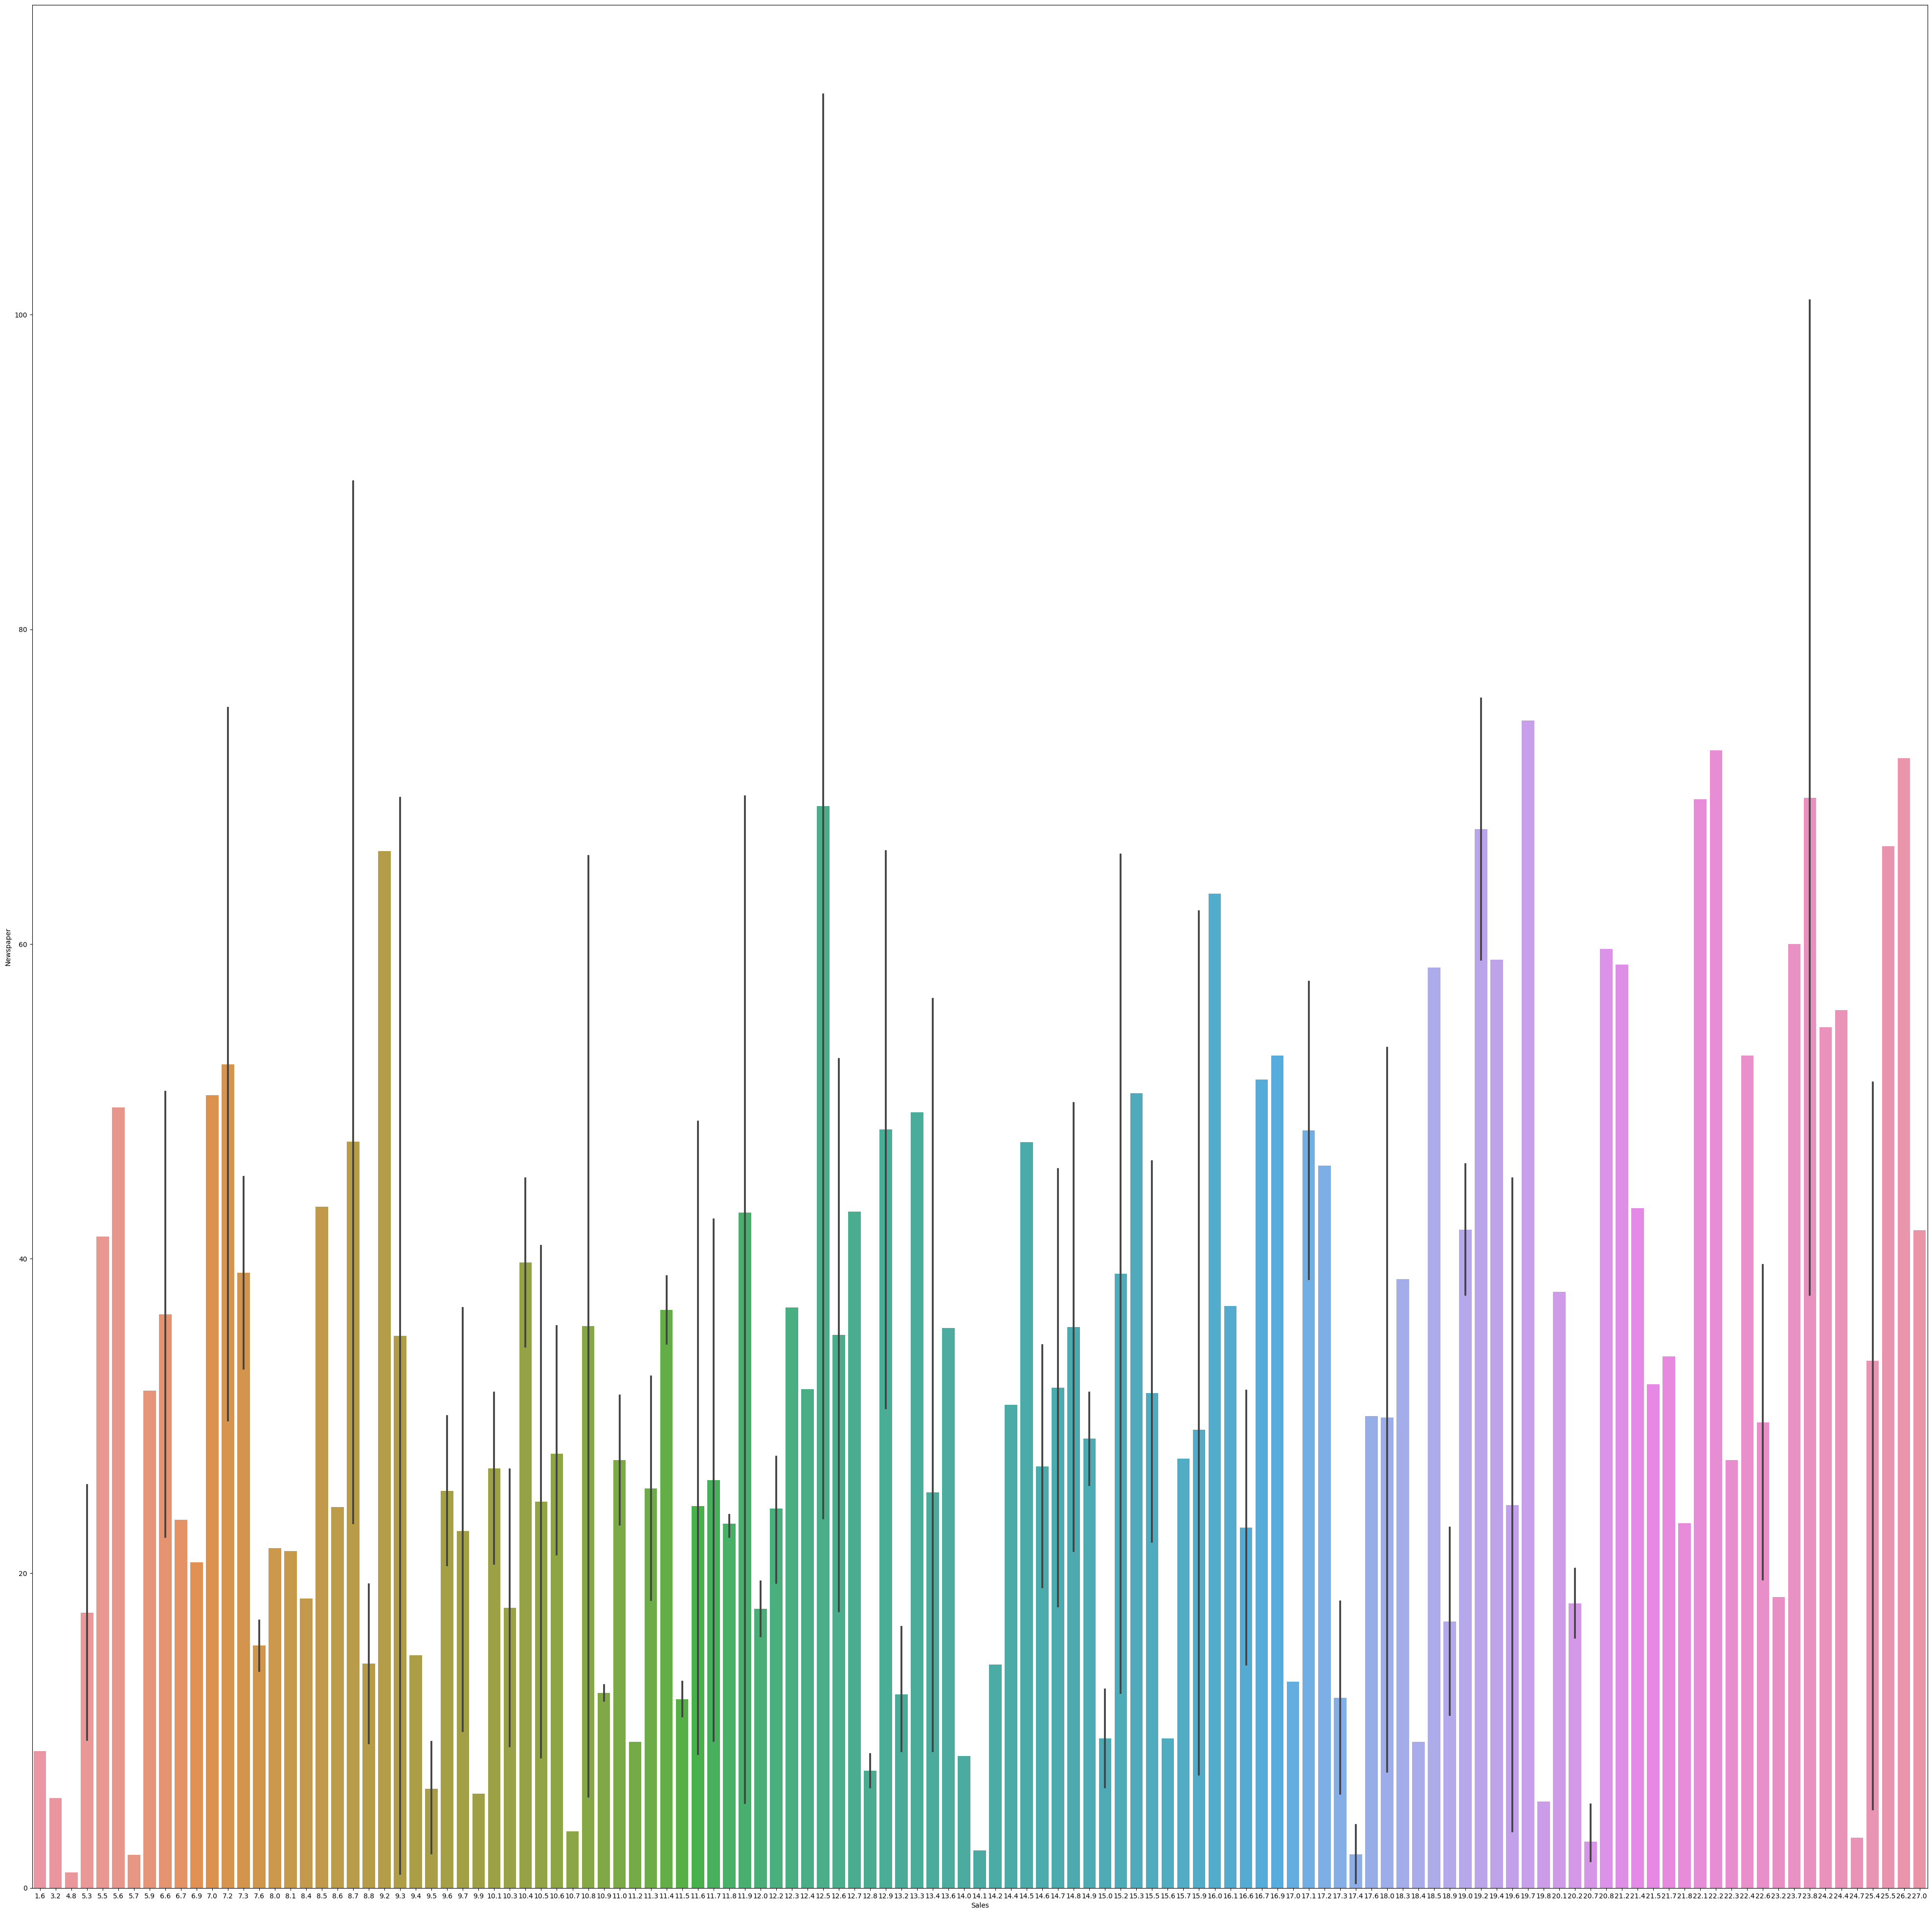

In [39]:
guntuku = ['TV', 'Radio', 'Newspaper']
for i in guntuku:
    plot.figure(figsize=(50,50))
    sbn.barplot(x="Sales",y=df5[i],data=df5);
    plot.show();

<Axes: >

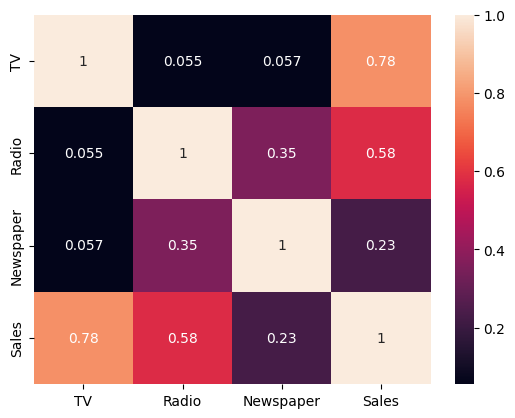

In [37]:
sbn.heatmap(data=df5.corr(),annot=True)

In [40]:
guntuku

['TV', 'Radio', 'Newspaper']

In [41]:
for i in guntuku:
  plot.figure(figsize=(20,20))
  plot.pie(df5[i])
  plot.show()

Output hidden; open in https://colab.research.google.com to view.

Apply some Machine Learning

In [43]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()
df5["Sales"]=le.fit_transform(df5["Sales"])

In [46]:
df5['Sales'].nunique()


121